# <b> Employee Performance Regression

# <b> Install PyCaret

In [1]:
# Install Pycaret
!pip install pycaret==2.2.3

# <b>Load Libraries


In [2]:
# Import libraries for data processing
import numpy as np
import pandas as pd
import warnings
import time
warnings.filterwarnings('ignore')

In [3]:
# Import libraries for vizualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn import set_config
set_config(display='text')

In [5]:
# Import all from PyCaret regression
from pycaret.regression import *

# Confirm Pycaret 2.2.3
from pycaret.utils import version
print('Confirm PyCaret version 2.2.X?')
print('PyCaret Version:', version())

Confirm PyCaret version 2.2.X?
PyCaret Version: 2.2.3


# <b> Load Dataset

In [7]:
# Load Dataset
dataset = pd.read_csv('Data/EmployeePerformance.csv')
dataset.head()

,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Site,Function_Field,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before
0,384091,100.000000,90.000000,90.000000,96.145833,100.000000,96.875000,100.000000,Kuala Lumpur,Agent,33,163,95.061728,94.230769,4.865031,0,0,85.71,97.14
1,369185,94.000000,100.000000,96.865528,96.865528,96.103896,95.890411,98.333333,Kuala Lumpur,Agent,33,306,95.081967,94.666667,4.830065,0,0,100.00,88.64
2,360854,94.444444,80.000000,92.936027,92.936027,100.000000,93.939394,96.296296,Kuala Lumpur,Agent,32,138,94.160584,94.736842,4.818841,2,1,80.00,92.31
3,374407,100.000000,95.000000,96.630435,96.630435,92.500000,95.652174,100.000000,Kuala Lumpur,Agent,32,148,98.648649,95.833333,4.844595,0,0,94.44,100.00
4,372496,96.875000,95.833333,94.278101,94.278101,83.333333,95.348837,100.000000,Kuala Lumpur,Agent,29,142,97.183099,98.550725,4.859155,0,0,100.00,90.91


In [8]:
# Check shape of the data and view if the dataset was loaded correctly
print('Shape of dataset (observations, features):', dataset.shape)
dataset.head(5).round(2)


Shape of dataset (observations, features): (102, 19)


,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Site,Function_Field,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before
0,384091,100.00,90.00,90.00,96.15,100.00,96.88,100.00,Kuala Lumpur,Agent,33,163,95.06,94.23,4.87,0,0,85.71,97.14
1,369185,94.00,100.00,96.87,96.87,96.10,95.89,98.33,Kuala Lumpur,Agent,33,306,95.08,94.67,4.83,0,0,100.00,88.64
2,360854,94.44,80.00,92.94,92.94,100.00,93.94,96.30,Kuala Lumpur,Agent,32,138,94.16,94.74,4.82,2,1,80.00,92.31
3,374407,100.00,95.00,96.63,96.63,92.50,95.65,100.00,Kuala Lumpur,Agent,32,148,98.65,95.83,4.84,0,0,94.44,100.00
4,372496,96.88,95.83,94.28,94.28,83.33,95.35,100.00,Kuala Lumpur,Agent,29,142,97.18,98.55,4.86,0,0,100.00,90.91


# <b>Exploratory Data Analysis (EDA)

In [9]:
# Describe the features in the dataset such as mean, std, min, max, etc.
dataset.describe().round(2)

,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,371097.88,95.65,94.10,95.55,95.19,94.91,94.97,96.54,14.24,173.94,95.83,95.62,4.81,1.61,0.88,96.04,95.58
std,10742.44,4.36,10.47,3.56,3.94,5.45,4.68,3.83,6.85,77.23,1.78,2.00,0.09,1.78,1.07,5.70,4.67
min,353039.00,77.78,0.00,80.56,80.00,75.00,80.00,83.33,3.00,52.00,89.66,87.16,4.41,0.00,0.00,75.00,80.00
25%,362108.00,93.75,92.45,93.87,93.28,92.31,92.94,95.00,8.00,116.25,94.71,94.67,4.77,0.00,0.00,94.12,92.92
50%,371781.00,96.15,94.94,95.83,96.01,96.00,95.86,97.33,15.00,158.00,95.81,95.59,4.82,1.00,1.00,100.00,96.49
75%,380697.75,100.00,100.00,97.56,97.57,100.00,98.15,100.00,17.00,226.25,96.99,97.11,4.87,2.00,1.00,100.00,100.00
max,388627.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,33.00,388.00,100.00,100.00,4.98,9.00,4.00,100.00,100.00


In [11]:
# Check null and duplicates
dataset.isnull().sum()
dataset.duplicated().sum()

0

In [12]:
# Create correlation for dataset
dataset_corr = dataset.corr().round(4)

In [13]:
# Drop Agent_ID from correlation dataset
dataset_corr = dataset_corr.drop(['Agent_ID'], axis=1)
dataset_corr = dataset_corr.drop(['Agent_ID'], axis=0)

In [14]:
# Create correlation matrix
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

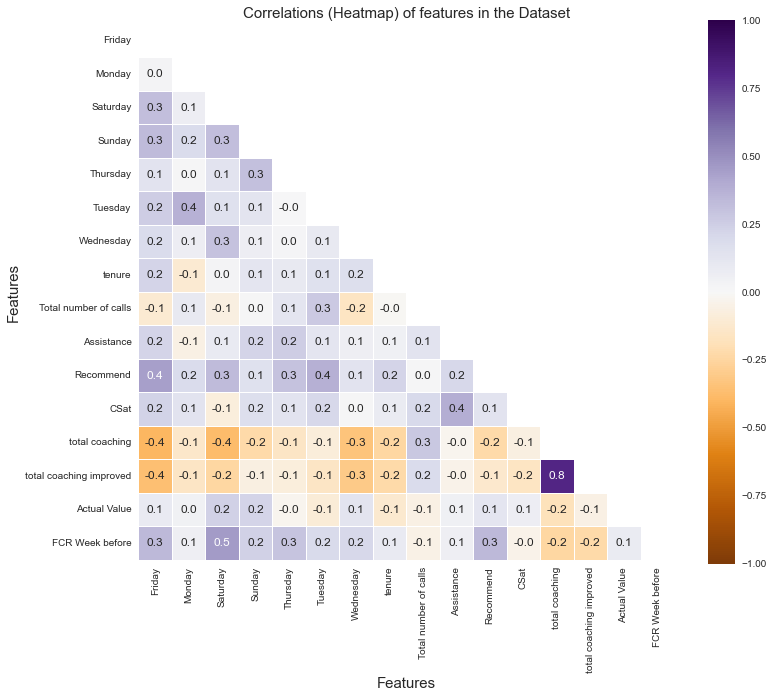

In [25]:
# Generate the correlation matrix (heatmap) using Seaborn
with sns.axes_style('whitegrid'):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center=0,
                     vmin=-1, square=True, cmap='PuOr', linewidth=.5,
                     annot=True, annot_kws={'size': 12}, fmt='.1f')
    plt.title('Correlations (Heatmap) of features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

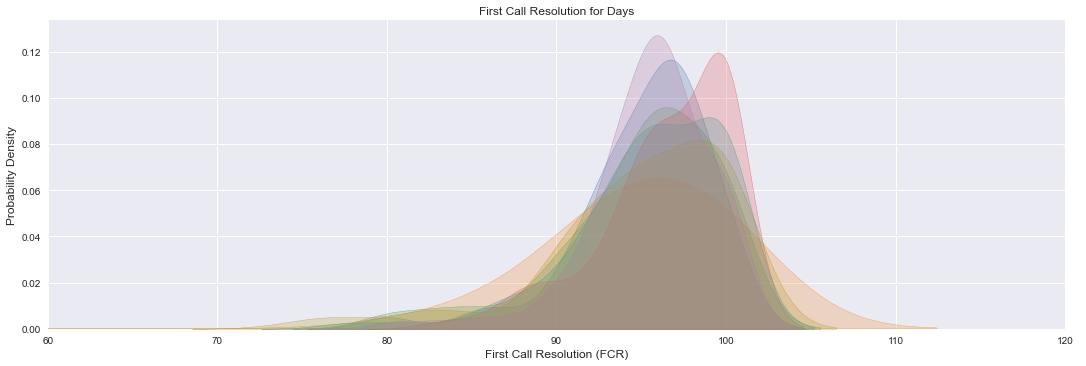

In [32]:
# Visualzie the FCR for specific day in the probability density chart
facet = sns.FacetGrid(dataset, aspect = 3, height = 5)
facet.map(sns.kdeplot, 'Sunday', shade = True, color='#4E79A7')
facet.map(sns.kdeplot, 'Monday', shade = True, color='#F28E2B')
facet.map(sns.kdeplot, 'Tuesday', shade = True, color='#59A14F')
facet.map(sns.kdeplot, 'Wednesday', shade = True, color='#E15759')
facet.map(sns.kdeplot, 'Thursday', shade = True, color='#B6992D')
facet.map(sns.kdeplot, 'Friday', shade = True, color='#499894')
facet.map(sns.kdeplot, 'Saturday', shade = True, color='#B07AA1')
facet.set(xlim=(60, dataset['Thursday'].max()))
facet.add_legend()
plt.xticks([60, 70, 80, 90, 100, 110, 120])
plt.title('First Call Resolution for Days', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.xlabel('First Call Resolution (FCR)', fontsize=12)
plt.show()

In [34]:
# Visualize the dispersion of FCR values in a given day to identify outliers

# Create a color set that matches the probability density chart
my_pal = {'Sunday': '#4E79A7', 'Monday': '#F28E2B', 'Tuesday': '#59A14F', 'Wednesday': '#E15759', 'Thursday': '#B6992D', 'Friday': '#499894', 'Saturday': '#B07AA1'}

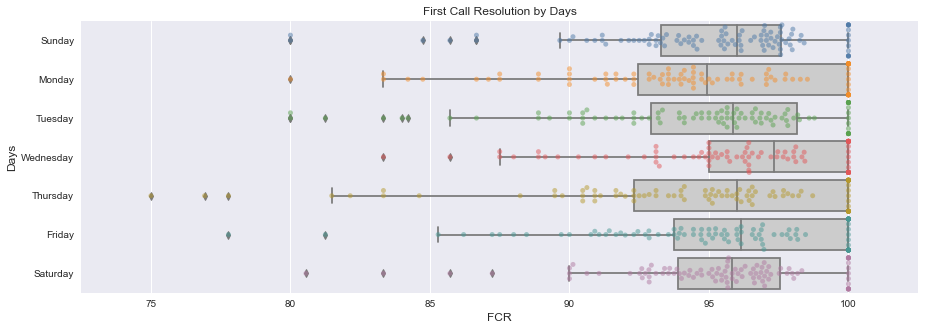

In [37]:
# Generate boxplot using Seaborn
dataset_boxplot = pd.DataFrame(data=dataset, columns=['Sunday', 'Monday', 'Tuesday',
                                                      'Wednesday', 'Thursday', 'Friday',
                                                      'Saturday'])
plt.figure(figsize=(15,5))
g = sns.boxplot(x='value', y='variable',
                data=pd.melt(dataset_boxplot),
                color='#cccccc')
g.set(xlim=(72.5, 102.5))
sns.swarmplot(x='value', y='variable',
              data=pd.melt(dataset_boxplot),
              palette=my_pal, alpha=0.5)
plt.title('First Call Resolution by Days', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.xlabel('FCR', fontsize=12)
plt.show()

# <b> Conduct Regression Model in Pycaret

In [39]:
# Transform dataset (transform, bin and create dummy variables) and split the dataset. 
# In addition, we are logging experiments and plots for those experiment to be viewed later with MLflow. 
reg_fcr = setup(data=dataset, target='Actual Value', session_id=786, transformation=True,
                normalize=False, train_size=0.75,
                numeric_features=('Sunday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 
                                 'Wednesday', 'Friday', 'Total number of calls', 'CSat', 'total coaching', 
                                 'total coaching improved', 'FCR Week before'),
                remove_outliers=True, outliers_threshold=0.05, remove_multicollinearity=True,
                multicollinearity_threshold=0.9, feature_selection=True, feature_interaction=True,
                ignore_features=['Agent_ID'], silent=False, combine_rare_levels=True,
                polynomial_features=True, trigonometry_features=True, feature_selection_threshold=0.4,
                feature_selection_method='classic', fold_shuffle=True, pca=True, log_experiment=True,
                log_plots=True, experiment_name='reg_fcr_experiments')

,Description,Value
0,session_id,786
1,Target,Actual Value
2,Original Data,"(102, 19)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(72, 35)"


In [40]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [41]:
top5 = compare_models(n_select=5, exclude=(['ransac', 'knn']), sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,3.5649,21.9993,4.6319,0.0882,0.0501,0.0385,0.4040
en,Elastic Net,3.7526,24.8694,4.8689,0.0802,0.0529,0.0408,0.4040
lasso,Lasso Regression,3.8988,26.7576,5.0475,0.0151,0.0548,0.0424,0.4280
omp,Orthogonal Matching Pursuit,4.2539,29.3489,5.3029,-0.1025,0.0569,0.0457,0.4100
et,Extra Trees Regressor,4.2293,30.2512,5.3944,-0.1745,0.0584,0.0459,0.0520
catboost,CatBoost Regressor,4.1347,31.2596,5.4283,-0.1046,0.0589,0.0453,0.3720
ridge,Ridge Regression,4.1843,29.6512,5.4398,-0.4793,0.0574,0.0443,0.4040
rf,Random Forest Regressor,4.2741,31.3806,5.4742,-0.1915,0.0591,0.0464,0.0580
ada,AdaBoost Regressor,4.1960,32.8095,5.5730,-0.1930,0.0604,0.0460,0.0200
llar,Lasso Least Angle Regression,4.2660,33.0453,5.5838,-0.1773,0.0606,0.0467,0.4140


In [43]:
# Sometimes we want to include the output of the compare_models() 
# as a screenshot into a report. However, with the yellow highlights 
# it gets difficult to read. Pycaret has thought of that and you can use the pull() 
# function to show the model results in the sort by or ascending order.

pull().sort_values(by='RMSE', ascending=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,3.5649,21.9993,4.6319,0.0882,0.0501,0.0385,0.404
en,Elastic Net,3.7526,24.8694,4.8689,0.0802,0.0529,0.0408,0.404
lasso,Lasso Regression,3.8988,26.7576,5.0475,0.0151,0.0548,0.0424,0.428
omp,Orthogonal Matching Pursuit,4.2539,29.3489,5.3029,-0.1025,0.0569,0.0457,0.410
et,Extra Trees Regressor,4.2293,30.2512,5.3944,-0.1745,0.0584,0.0459,0.052
catboost,CatBoost Regressor,4.1347,31.2596,5.4283,-0.1046,0.0589,0.0453,0.372
ridge,Ridge Regression,4.1843,29.6512,5.4398,-0.4793,0.0574,0.0443,0.404
rf,Random Forest Regressor,4.2741,31.3806,5.4742,-0.1915,0.0591,0.0464,0.058
ada,AdaBoost Regressor,4.1960,32.8095,5.5730,-0.1930,0.0604,0.0460,0.020
llar,Lasso Least Angle Regression,4.2660,33.0453,5.5838,-0.1773,0.0606,0.0467,0.414


In [45]:
# We can tune our top 5 models dynamically with a higher iteration rate (n_iter) 
# to find more optimal hyper parameters over a larger search space. 

tuned_top5 = [tune_model(i, n_iter=120, optimize='RMSE', fold=5) for i in top5] 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1314,18.8154,4.3377,-0.1478,0.0460,0.0339
1,4.6720,36.7259,6.0602,0.1164,0.0665,0.0516
2,4.7852,44.4405,6.6664,0.1159,0.0755,0.0548
3,3.2413,13.8949,3.7276,-0.6363,0.0382,0.0331
4,4.2286,26.1899,5.1176,0.2800,0.0554,0.0454
Mean,4.0117,28.0133,5.1819,-0.0544,0.0563,0.0437
SD,0.7000,11.2518,1.0777,0.3217,0.0135,0.0089


In [46]:
# Blending models is an ensemble method of combining different machine learning algorithms
# and use a majority vote to build consensus of final prediction values. Building 
# a blending model from our top 5 models and evaluating the results. 

blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', 
                                choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2264,18.3763,4.2868,-0.1210,0.0452,0.0345
1,4.2953,26.8691,5.1835,0.3535,0.0566,0.0465
2,4.0842,34.4389,5.8685,0.3149,0.0670,0.0470
3,2.3846,10.1943,3.1928,-0.2005,0.0328,0.0245
4,3.5212,17.7576,4.2140,0.5118,0.0454,0.0375
Mean,3.5023,21.5272,4.5491,0.1717,0.0494,0.0380
SD,0.6772,8.3405,0.9126,0.2805,0.0116,0.0084


In [47]:
# Below is a view of the model parameters. 

blender_specific

TunableVotingRegressor(estimators=[('br',
                                    BayesianRidge(alpha_1=0.0001,
                                                  alpha_2=0.0001,
                                                  alpha_init=None,
                                                  compute_score=False,
                                                  copy_X=True,
                                                  fit_intercept=True,
                                                  lambda_1=0.001, lambda_2=0.3,
                                                  lambda_init=None, n_iter=300,
                                                  normalize=False, tol=0.001,
                                                  verbose=False)),
                                   ('en',
                                    ElasticNet(alpha=0.34, copy_X=True,
                                               fit_intercept=True,
                                               l1_ratio=0.208, max_it

In [48]:
# Stacking models is an ensemble method of using meta learning, 
# where a meta model is created using multiple base estimators 
# to generate the final prediction. Building a stacking model 
# from our top 5 models and evaluating the results. 

stacker_specific = stack_models(estimator_list=tuned_top5[1:], meta_model=tuned_top5[0],
                                fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.5345,21.3423,4.6198,-0.3020,0.0487,0.0376
1,4.0754,25.8337,5.0827,0.3784,0.0553,0.0439
2,4.4443,30.9779,5.5658,0.3838,0.0628,0.0498
3,2.5487,12.1204,3.4814,-0.4273,0.0359,0.0262
4,3.7337,19.9464,4.4661,0.4517,0.0480,0.0398
Mean,3.6673,22.0442,4.6432,0.0969,0.0501,0.0395
SD,0.6393,6.2856,0.6965,0.3798,0.0089,0.0078


In [49]:
# Below is a view of the model parameters. 

stacker_specific

StackingRegressor(cv=KFold(n_splits=5, random_state=786, shuffle=True),
                  estimators=[('en',
                               ElasticNet(alpha=0.34, copy_X=True,
                                          fit_intercept=True, l1_ratio=0.208,
                                          max_iter=1000, normalize=False,
                                          positive=False, precompute=False,
                                          random_state=786, selection='cyclic',
                                          tol=0.0001, warm_start=False)),
                              ('lasso',
                               Lasso(alpha=0.33, copy_X=True,
                                     fit_intercept=True, max_iter=1...
                                                   n_estimators=220, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=786, verbose=0,
                                         

In [50]:
# Use Pycaret's built in evaluate_model() function to generate plots

evaluate_model(blender_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [51]:
evaluate_model(stacker_specific)
evaluate_model(blender_specific)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [52]:
# Execute the predict_model() function to use the model to generate the predicted values. 

pred_tuned_blender = predict_model(blender_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,4.6371,32.0141,5.6581,-0.6226,0.0594,0.0491


In [53]:
# Execute the predict_model() function to use the model to generate the predicted values. 

pred_tuned_stacker = predict_model(stacker_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,5.2124,40.0346,6.3273,-1.0291,0.0663,0.0550


In [68]:
# The Blend model seems to perform better in both our train and test so let us finalize it. 
# The finalize_model() function trains the model on the entire dataset. 

finalize_blender = finalize_model(blender_specific)

# <b>Analyze the Performance of Final Model on Entire Dataset


In [60]:
# The predict_model() can be executed with the final blend model over the entire dataset 
# and saved to a csv file.

pred_final_blender = predict_model(finalize_blender, data=dataset)
pred_final_blender.to_csv('pred_final_blender.csv')
pred_final_blender.describe()

,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before,Label
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,371097.882353,95.650593,94.096218,95.552565,95.186928,94.907817,94.968364,96.544911,14.235294,173.941176,95.832315,95.622119,4.807622,1.607843,0.882353,96.036176,95.578725,96.036178
std,10742.442598,4.355132,10.465289,3.558242,3.941495,5.453729,4.675461,3.829237,6.846516,77.234608,1.784522,1.997818,0.089011,1.775281,1.074402,5.700526,4.674600,2.035925
min,353039.000000,77.777778,0.000000,80.555556,80.000000,75.000000,80.000000,83.333333,3.000000,52.000000,89.655172,87.162162,4.413793,0.000000,0.000000,75.000000,80.000000,89.336081
25%,362108.000000,93.750000,92.445055,93.873767,93.284134,92.307692,92.938312,95.000000,8.000000,116.250000,94.711729,94.666667,4.767000,0.000000,0.000000,94.120000,92.920000,95.414492
50%,371781.000000,96.153846,94.935897,95.833414,96.013439,96.000000,95.861872,97.329060,15.000000,158.000000,95.806136,95.589688,4.819492,1.000000,1.000000,100.000000,96.490000,96.433529
75%,380697.750000,100.000000,100.000000,97.556895,97.568007,100.000000,98.146168,100.000000,17.000000,226.250000,96.988326,97.113066,4.865194,2.000000,1.000000,100.000000,100.000000,97.215953
max,388627.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,33.000000,388.000000,100.000000,100.000000,4.984127,9.000000,4.000000,100.000000,100.000000,99.628266


In [61]:
evaluate_model(finalize_blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

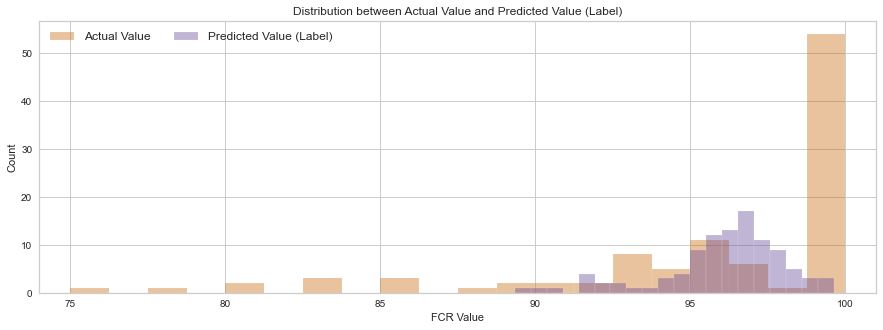

In [63]:
# We can see how the predicted values seem to peak in a more distributed manner
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.distplot(pred_final_blender['Actual Value'],
             bins=20,
             kde=False,
             color="#c6690c")
sns.distplot(pred_final_blender['Label'],
             bins=20,
             kde=False,
             color="#664697")
plt.title('Distribution between Actual Value and Predicted Value (Label)')
plt.ylabel('Count')
plt.xlabel('FCR Value')
plt.xlim((74, 101))
plt.legend(('Actual Value', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12);

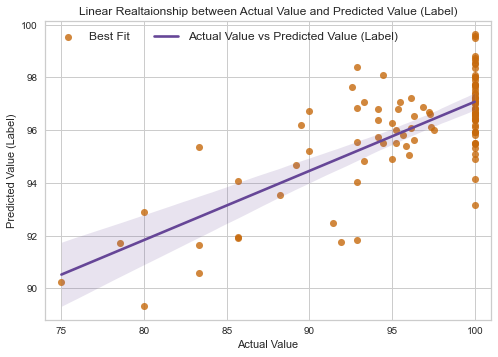

In [65]:
sns.regplot(x='Actual Value', y='Label', data=pred_final_blender, lowess=False, scatter_kws={'s':50}, line_kws={'color': "#664697"}, color="#c6690c")
plt.title('Linear Realtaionship between Actual Value and Predicted Value (Label)')
plt.ylabel('Predicted Value (Label)')
plt.xlabel('Actual Value')
plt.xlim((74, 101))
plt.legend(('Best Fit', 'Actual Value vs Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12);

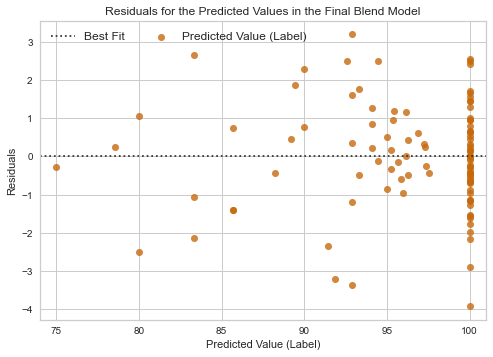

In [66]:
sns.residplot(x='Actual Value', y='Label', data=pred_final_blender, lowess=False, scatter_kws={'s':50}, line_kws={'color': "#664697"}, color="#c6690c")
plt.title('Residuals for the Predicted Values in the Final Blend Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Value (Label)')
plt.xlim((74, 101))
plt.legend(('Best Fit', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12);

# <b> Client Presentation and Next Steps

In [69]:
# Generating the classification label based on the regression analysis
pred_final_blender.loc[(pred_final_blender['Actual Value'] >= pred_final_blender['FCR Week before']) & 
                       (pred_final_blender['Label'] > pred_final_blender['FCR Week before']), 'Pred_Class'] = 'True Positive'

pred_final_blender.loc[(pred_final_blender['Actual Value'] < pred_final_blender['FCR Week before']) & 
                       (pred_final_blender['Label'] < pred_final_blender['FCR Week before']), 'Pred_Class'] = 'True Negative'

pred_final_blender.loc[(pred_final_blender['Actual Value'] >= pred_final_blender['FCR Week before']) & 
                       (pred_final_blender['Label'] < pred_final_blender['FCR Week before']), 'Pred_Class'] = 'False Negative'

pred_final_blender.loc[(pred_final_blender['Actual Value'] < pred_final_blender['FCR Week before']) & 
                       (pred_final_blender['Label'] > pred_final_blender['FCR Week before']), 'Pred_Class'] = 'False Positive'

In [71]:
pred_final_blender
pred_final_blender.to_csv('pred_final_blender.csv')

cf_values = pred_final_blender['Pred_Class'].value_counts()
cf_values



True Positive     42
False Negative    28
True Negative     25
False Positive     7
Name: Pred_Class, dtype: int64

[Text(0, 0.5, 'Performance Increase'), Text(0, 1.5, 'Performance Decrease')]

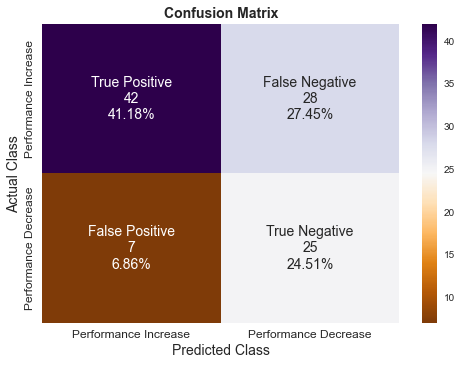

In [77]:
# Create confusion matrix table along with labels, counts and percentages
cf_matrix = np.array([[cf_values.loc['True Positive'], cf_values.loc['False Negative']],
                      [cf_values.loc['False Positive'], cf_values.loc['True Negative']]])
                      
group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
                      
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]   

group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
                      
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# Creating confusion matrix wit Seaborn
ax = plt.subplot()
plt.rcParams.update({'font.size': 14})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuOr')

# Setting labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('Actual Class', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax.xaxis.set_ticklabels(['Performance Increase', 'Performance Decrease'], fontsize=12)
ax.yaxis.set_ticklabels(['Performance Increase', 'Performance Decrease'], va='center', fontsize=12)

Formulas for classification metrics can be found at mine notebook [here](https://github.com/aurimas13/CodeAcademy-AI-Course/blob/main/Examples/Machine_Learning_with_Python_session_2_updated_version_2.ipynb)

In [80]:
# Below are the classification metrics. 
accuracy = '{0:.2%}'.format((cf_values.loc['True Positive'] + cf_values.loc['True Negative']) 
                            / (cf_values.loc['True Positive'] + cf_values.loc['False Positive'] 
                               + cf_values.loc['True Negative'] + cf_values.loc['False Negative']))
print('Accuracy: ', accuracy)

sensitivity = '{0:.2%}'.format((cf_values.loc['True Positive']) / (cf_values.loc['True Positive'] 
                                                                   + cf_values.loc['False Negative']))
print('Sensitivity (Recall): ', sensitivity)

specificity = '{0:.2%}'.format((cf_values.loc['True Negative']) / (cf_values.loc['True Negative'] 
                                                                   + cf_values.loc['False Positive']))
print('Specificity (True Negative Rate): ', specificity)

precision = '{0:.2%}'.format((cf_values.loc['True Positive']) / (cf_values.loc['True Positive']
                                                                 + cf_values.loc['False Positive']))
print('Precision (Positive Predictive Value): ', precision)

f1 = '{0:.2%}'.format((2 * cf_values.loc['True Positive']) / (2 * cf_values.loc['True Positive']
                                                              + cf_values.loc['False Positive']
                                                              + cf_values.loc['False Negative']))
print('F1 Score (Precision and Sensitivity): ', f1)


Accuracy:  65.69%
Sensitivity (Recall):  60.00%
Specificity (True Negative Rate):  78.12%
Precision (Positive Predictive Value):  85.71%
F1 Score (Precision and Sensitivity):  70.59%


# <b> Conclusion

Getting accuracy over 65% is more likely to move this model in to production. We can confidently predict whether the employee will increase or decrease in performance. Even more so, for employees we think will decrease in performance, we can get ahead of that and ask the supervisor to coach them and support them to mitigate the decrease in performance.

We can see how versatile Pycaret is in experimenting real case scenarios. Most companies do not have terabytes of data so as a data-scientists, we can use Pycaret in many daily business situations to make more meaningful and data-driven decisions.

# Sources and References

Matplotlib.  Retrieved December 22, 2022 from https://matplotlib.org

Numpy.  Retrieved December 22, 2022 from https://numpy.org/

Pandas.  Retrieved December 22, 2022 from https://pandas.pydata.org/

Pycaret. (2022, December 22). Retrieved December 22, 2022 from https://pycaret.org/

Python. Retrieved December 22, 2022 from https://www.python.org/

Scikit Learn: Learn. Retrieved December 22, 2022 from https://scikit-learn.org/

Seaborn. Retrieved December 2, 2022 from https://seaborn.pydata.org/

# <b> END OF PYCARET DEMONSTRATION REGRESSION EXAMPLE 